# Project Objectives:
- In this project I aim to predict sales using neural network model in Keras
- Author: Carlos Caballero - Data Scientist
- Dataset: Sample Superstore from Tableau Community
- Models: Multilayer Perceptron (MLP), Adam optimizer, input and hidden layer activation: ReLu
- Method: Regression using 8 neurons in the hidden layer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# Read in data
store = pd.read_excel('superstore.xls')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
# Check out number of columns
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# See shape of the data
store.shape

(9994, 21)

In [5]:
# See how clean the data is
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Check data types
store.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
# Obtain turnaround time in days from order date to ship date
store['Turn'] = store['Ship Date'] - store['Order Date']

In [8]:
store['Turn'].head()

0   4 days
1   4 days
2   4 days
3   4 days
4   7 days
Name: Turn, dtype: timedelta64[ns]

In [9]:
# Turn timedelta into string
store['Turn'] = store['Turn'].astype(str)
store['Turn'].head()

0    4 days 00:00:00.000000000
1    4 days 00:00:00.000000000
2    4 days 00:00:00.000000000
3    4 days 00:00:00.000000000
4    7 days 00:00:00.000000000
Name: Turn, dtype: object

In [10]:
# Leave only the number of days
store['Turn'] = store['Turn'].str.split("").str[1]
store['Turn'].head()

0    4
1    4
2    4
3    4
4    7
Name: Turn, dtype: object

In [11]:
# Convert Turn feature into integer
store['Turn']= store['Turn'].astype(int)

In [12]:
# Convert Postal Code feature into string
store['Postal Code'] = store['Postal Code'].astype(str)

In [13]:
# I don't need this feature
del store['Row ID']

## Explore data

In [14]:
# Descriptive stats
store.describe()

,Sales,Quantity,Discount,Profit,Turn
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,17.280000,2.000000,0.000000,1.728750,3.000000
50%,54.490000,3.000000,0.200000,8.666500,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,7.000000


In [15]:
store.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Turn'],
      dtype='object')

In [16]:
store['Ship Mode'].value_counts(normalize=True)

Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: Ship Mode, dtype: float64

In [17]:
store['Segment'].value_counts(normalize=True)

Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64

In [18]:
store['State'].value_counts(normalize=True).head(10)

California        0.200220
New York          0.112868
Texas             0.098559
Pennsylvania      0.058735
Washington        0.050630
Illinois          0.049230
Ohio              0.046928
Florida           0.038323
Michigan          0.025515
North Carolina    0.024915
Name: State, dtype: float64

In [19]:
store['Region'].value_counts(normalize=True)

West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: Region, dtype: float64

In [20]:
store['Category'].value_counts(normalize=True)

Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64

In [21]:
store['Sub-Category'].value_counts(normalize=True).head(5)

Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Name: Sub-Category, dtype: float64

## Pre-Process for Modeling

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [23]:
X = store[['Profit','Discount','Quantity', 'Turn']]
y = store['Sales']

In [24]:
# Normalize predictors
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Profit,Discount,Quantity,Turn
0,-0.098633,0.212143,-0.804263,0.023933
1,-0.104095,0.212143,-0.354847,0.023933
2,-0.398837,0.212143,-0.354847,0.023933
3,-0.145752,3.118388,-0.804263,0.023933
4,-0.101481,0.212143,-0.354847,1.740606


In [25]:
X_norm.head()

,Profit,Discount,Quantity,Turn
0,-0.098633,0.212143,-0.804263,0.023933
1,-0.104095,0.212143,-0.354847,0.023933
2,-0.398837,0.212143,-0.354847,0.023933
3,-0.145752,3.118388,-0.804263,0.023933
4,-0.101481,0.212143,-0.354847,1.740606


In [26]:
#X = pd.get_dummies(X)

In [27]:
#X.head()

In [28]:
y.head()

0     16.448
1     11.784
2    272.736
3      3.540
4     19.536
Name: Sales, dtype: float64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (6995, 4)
y_train shape:  (6995,)
X_test shape:  (2999, 4)
y_test shape:  (2999,)


In [31]:
n_cols = X_train.shape[1]
n_cols

4

## Train and Test the Network

In [32]:
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return model

In [33]:
# Build model
store_model = regression_model()

In [34]:
# fit the model
history = store_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8)

Train on 6995 samples, validate on 2999 samples
Epoch 1/8
6995/6995 [==============================] - 0s 34us/step - loss: 423559.8089 - accuracy: 0.0000e+00 - val_loss: 613932.5017 - val_accuracy: 0.0000e+00
Epoch 2/8
6995/6995 [==============================] - 0s 22us/step - loss: 390634.8591 - accuracy: 1.4296e-04 - val_loss: 567302.7383 - val_accuracy: 3.3344e-04
Epoch 3/8
6995/6995 [==============================] - 0s 22us/step - loss: 361870.0622 - accuracy: 0.0000e+00 - val_loss: 519513.2743 - val_accuracy: 0.0000e+00
Epoch 4/8
6995/6995 [==============================] - 0s 22us/step - loss: 338021.3372 - accuracy: 0.0000e+00 - val_loss: 481813.5669 - val_accuracy: 0.0000e+00
Epoch 5/8
6995/6995 [==============================] - ETA: 0s - loss: 302144.4756 - accuracy: 1.7077e-0 - 0s 23us/step - loss: 311557.3628 - accuracy: 1.4296e-04 - val_loss: 440578.4892 - val_accuracy: 0.0000e+00
Epoch 6/8
6995/6995 [==============================] - 0s 22us/step - loss: 276496.0951 - 

In [35]:
# evaluate the model
scores = store_model.evaluate(X_test, y_test, verbose=0)

In [36]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))        

Accuracy: 0.0% 
 Error: 1.0


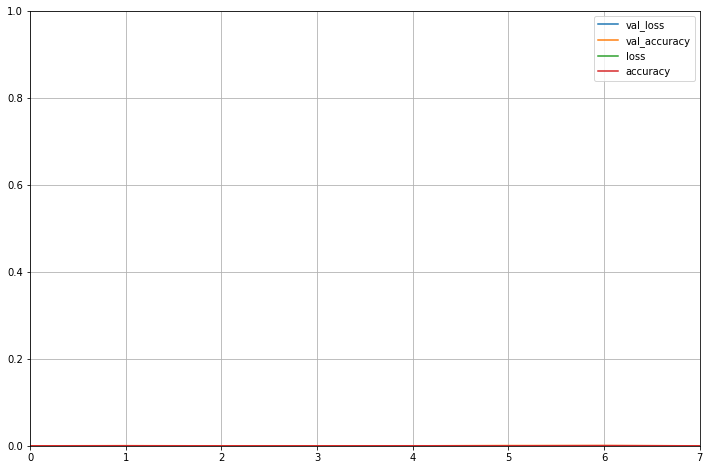

In [37]:
# Visualize model
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()